In [1]:
!pip install matplotlib seaborn scipy


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The dataset contains 5344 rows and 98 columns.

Prime data:


,T_data_1_1_start,T_data_1_1_end,T_data_1_1_mean,T_data_1_1_max,T_data_1_1_min,T_data_1_1_delta,T_data_1_2_start,T_data_1_2_end,T_data_1_2_mean,T_data_1_2_max,...,T_data_5_3_min,T_data_5_3_delta,H_data_start,H_data_end,H_data_mean,H_data_max,H_data_min,H_data_delta,AH_data,quality
0,280.0,291.0,286.766667,292.0,280.0,0.220339,282.0,285.0,283.583333,285.0,...,253.0,0.050847,148.90,148.69,150.007833,155.72,145.98,2.362881,6.04,456.0
1,234.0,233.0,233.983333,234.0,233.0,0.016949,243.0,231.0,237.400000,243.0,...,247.0,0.135593,178.69,173.73,175.158167,178.69,171.29,1.818644,4.71,384.0
2,262.0,257.0,259.950000,262.0,257.0,0.084746,268.0,267.0,268.283333,269.0,...,237.0,0.101695,175.33,173.79,176.438333,181.93,171.75,2.338305,5.00,364.0
3,227.0,222.0,223.350000,227.0,222.0,0.084746,222.0,220.0,221.150000,222.0,...,298.0,0.101695,178.04,175.02,177.182667,180.36,172.95,2.247119,8.21,436.0
4,222.0,223.0,223.400000,224.0,222.0,0.050847,219.0,213.0,215.516667,219.0,...,249.0,0.118644,161.50,158.86,160.838000,166.67,156.95,2.178305,8.07,455.0


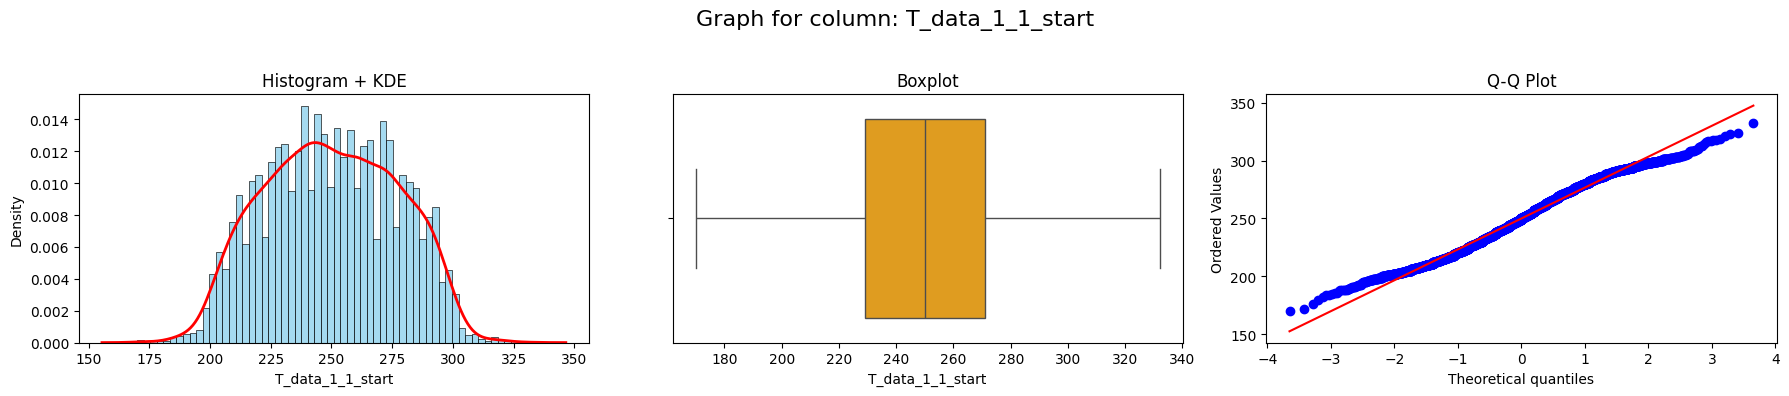

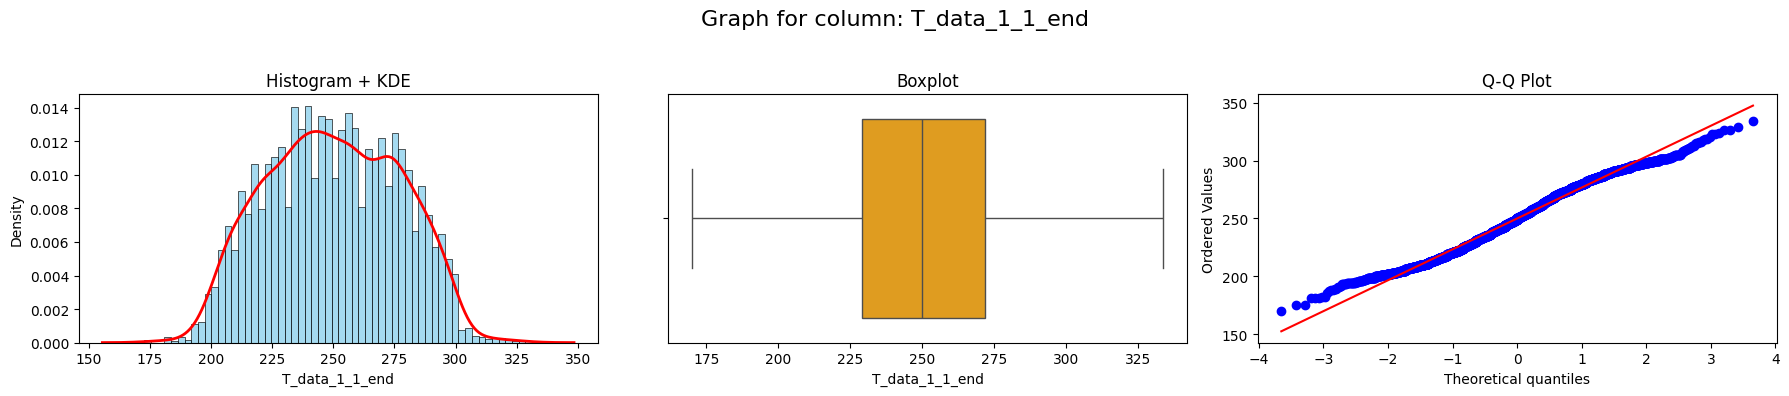

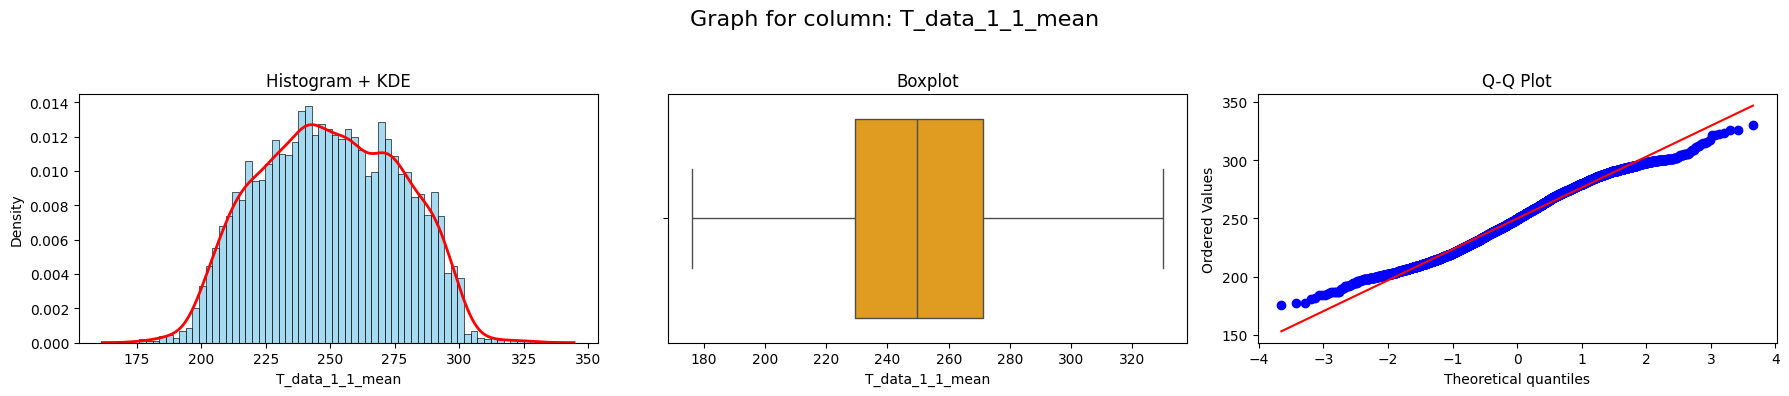

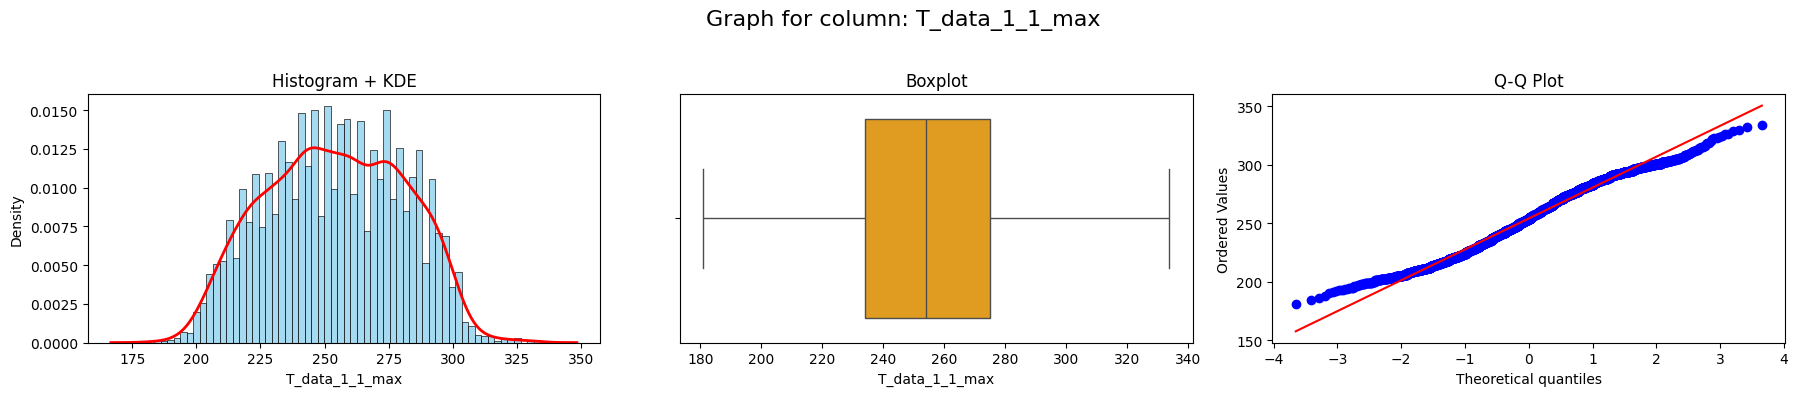

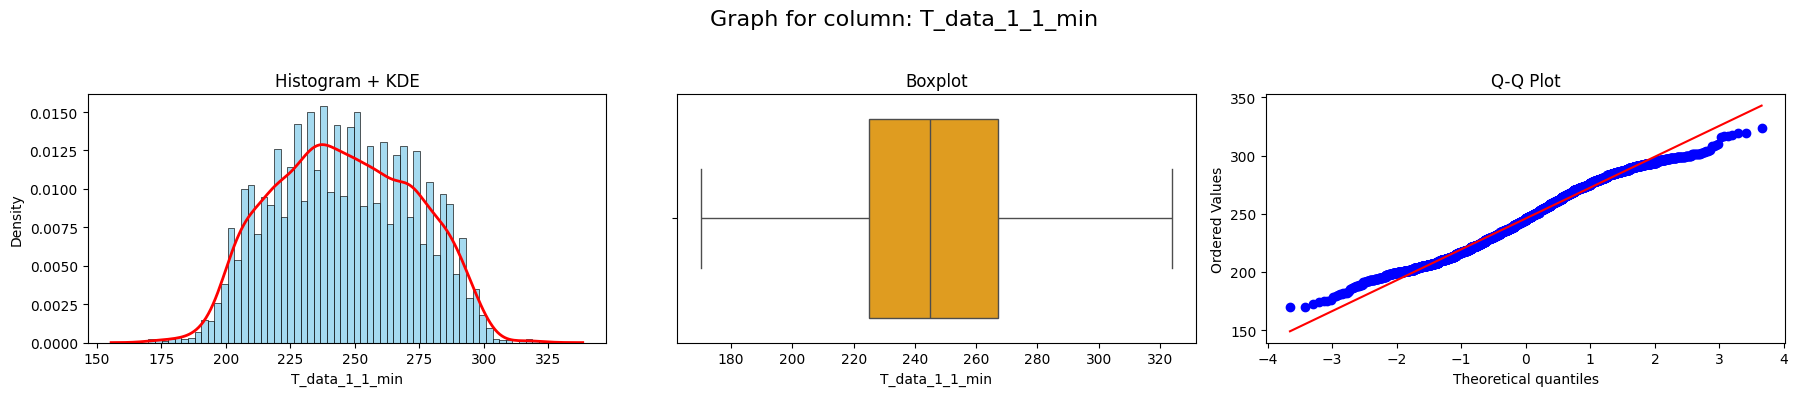

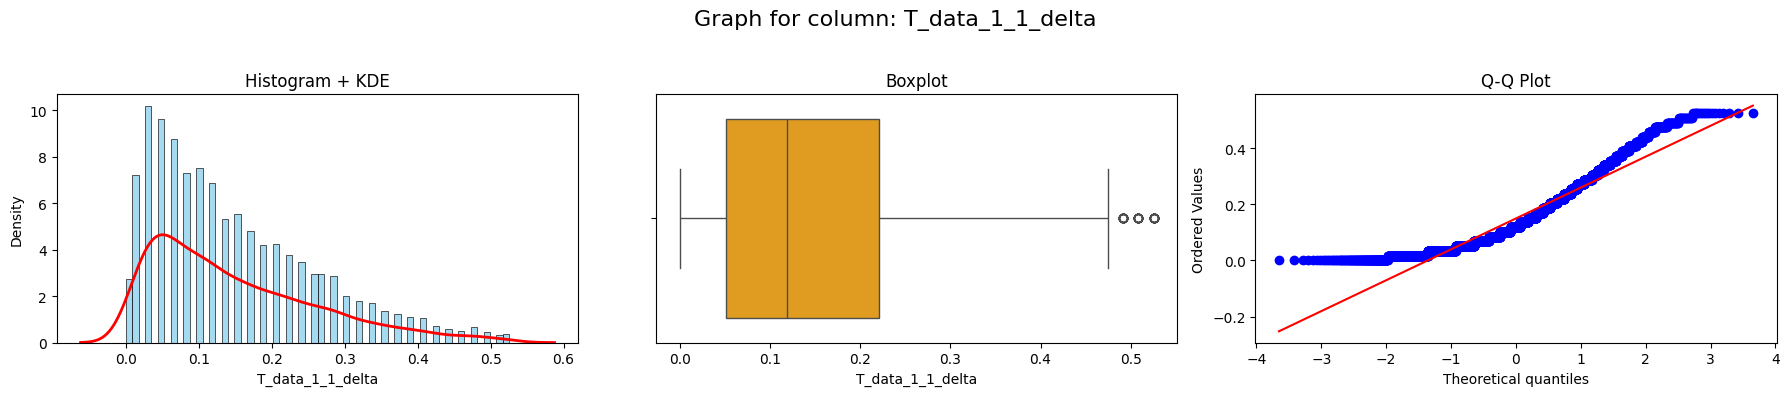

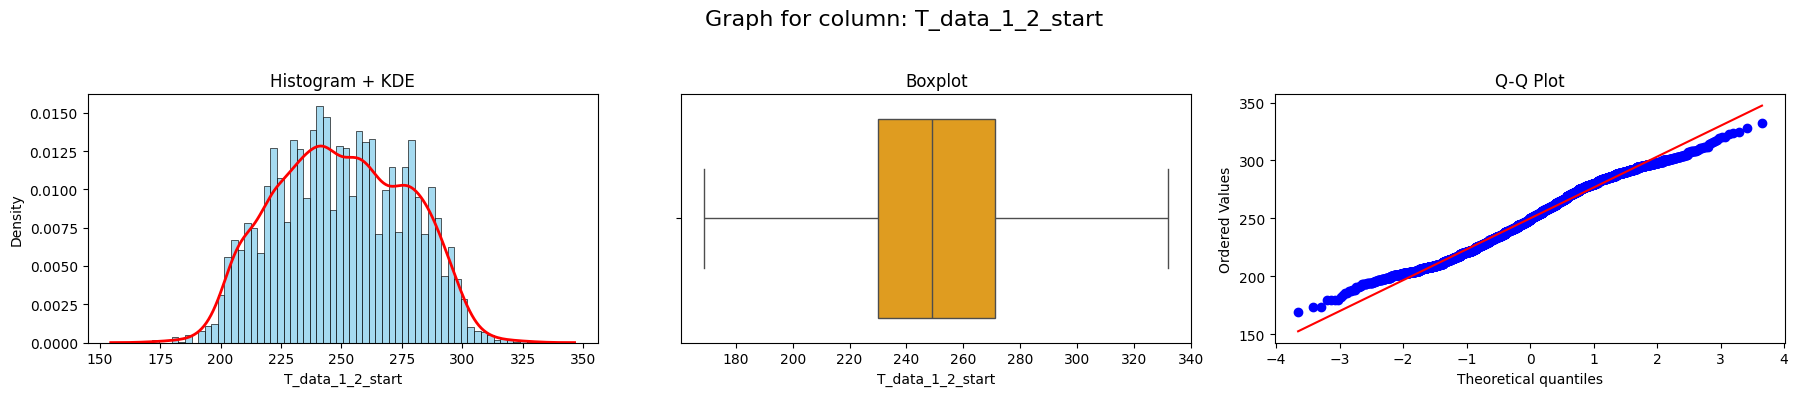

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

# 📂 Đổi tên file ở đây
filename = '../../resources/processed_data/data_train_Group_Out_Cluster_clean.arff'  # ← Đổi tên file .csv hoặc .arff nếu cần

# 📥 Đọc dữ liệu
ext = os.path.splitext(filename)[1]

if ext == '.csv':
    df = pd.read_csv(filename, encoding='utf-8')
elif ext == '.arff':
    from scipy.io import arff
    data, meta = arff.loadarff(filename)
    df = pd.DataFrame(data)
else:
    print("⚠️ File không hợp lệ! Vui lòng dùng .csv hoặc .arff.")
    df = None

# ✅ Nếu có dữ liệu thì xử lý
if df is not None:
    # 🔧 Chuyển byte -> float nếu cần
    for col in df.columns:
        if df[col].dtype == object:
            try:
                df[col] = df[col].apply(lambda x: float(x.decode('utf-8')) if isinstance(x, bytes) else float(x))
            except:
                pass

    # ➕ Thêm dòng in số hàng và cột
    print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

    # 📊 Hiển thị dữ liệu đầu
    print("Prime data:")
    display(df.head())

    # 🧠 Lấy các cột số đầu tiên (có thể chỉnh số lượng)
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns[:7]

    # 📈 Vẽ biểu đồ cho mỗi cột
    for col in numeric_cols:
        data_col = df[col].dropna()

        fig, axes = plt.subplots(1, 3, figsize=(18, 4))
        fig.suptitle(f'Graph for column: {col}', fontsize=16)

        # 1️⃣ Histogram + KDE
        sns.histplot(data_col, bins=60, stat='density', color='skyblue', kde=False, ax=axes[0])
        sns.kdeplot(data_col, color='red', linewidth=2, ax=axes[0])
        axes[0].set_title('Histogram + KDE')
        axes[0].set_xlabel(col)

        # 2️⃣ Boxplot
        sns.boxplot(x=data_col, color='orange', ax=axes[1])
        axes[1].set_title('Boxplot')
        axes[1].set_xlabel(col)

        # 3️⃣ Q-Q Plot
        stats.probplot(data_col, dist="norm", plot=axes[2])
        axes[2].set_title('Q-Q Plot')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
